<a href="https://colab.research.google.com/github/Shambhurajdesai/Capstone-3---Cardio-Vascular-Risk--Classification/blob/main/Cardio_Vascular_Risk_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

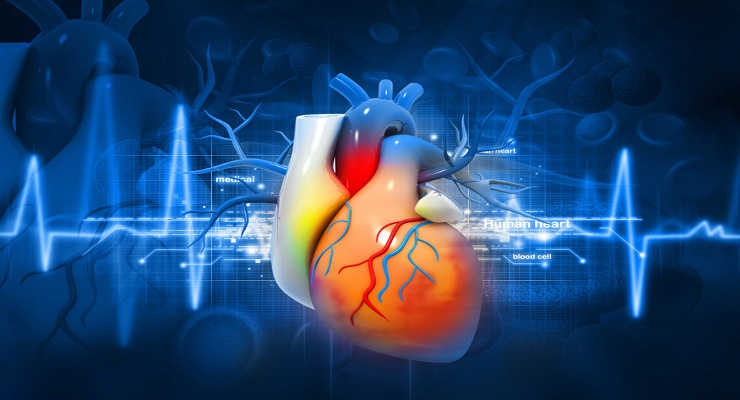

#Project Title: <font color='yellow'>**Cardio Vascular Risk Prediction**

###<font color='red'>Problem Description
###The dataset is from an ougoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether a patient has 10 year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is potential risk factor. There are both demographic and behavioural and medical risk factor.

###**Data Description**
**Data_Cardio_Vascular_Risk** - Various factors affecting the health

**Data Fields**

The Following description is given about the dataset



*  Sex - Gender
*  Age - Age


*   is_smoking - whether smoking currently or not
*   Cigs_per_day - Cigarettes smoked per day


*   BP_Meds - Whether taking BP meds or not
*   Prevalent stroke - If the patient has a history of stroke


*   Prevalent hyp - If the patient has a history of hypertension
*   Diabetes - Patient has diabetes or not



*   Tot Chol - Cholesterol measure
*   Sys BP - Systolic blood pressure


*   Dia BP - Diastolic blood pressure
*   BMI - Body Mass Index


*   Heart Rate - Heart Rate measure










###<font color='green'>Health statement -

In today's day to day life a human being is surrounded by different types of risk, the risk is individually a part of our habits and addictions. Addictions like smoking, alcohol, unhealthy food etc. 
These some factors are affects on heart and its health. 

This project has real world health problem and by using some statistics and Machine Learning algorithms we try to fit a model to predict the Coronary Heart Disease (CHD).

In [119]:
#importing the liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# import smote_variants as sv 

from collections import Counter

In [120]:
#connecting the google drive to the colab for data importing
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [121]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/data_cardiovascular_risk.csv')

In [122]:
#top 5 rows of the data set
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [123]:
#bottom 5 rows of the data set
df.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [124]:
#shape of a data set
df.shape

(3390, 17)

In [125]:
#size of a data set
df.size

57630

In [126]:
#description of a data set
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [127]:
#there are no duplicates in the data set
len(df[df.duplicated()])

0

In [128]:
#we dropping the 'id' columns, because no use of it
df.drop('id',axis=1,inplace=True)

### **Data** **Cleaning**

In [129]:
#checking for null values in the data set
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

###**So there are null values in the data set, and we filled them**

In [130]:
#by using 'pad' we filled the null values by their post value
df = df.fillna(method='pad')

In [131]:
#again checking for null value we can see, BMI column has one null value
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                1
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [132]:
#replacing the null value by its next value 
df['BMI'] = df['BMI'].fillna(method='bfill')

In [133]:
#now here we filled all the null values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##**Data** **Wrangling**

In [134]:
#here is our target variable 'TenYearCHD' and we take actual count of that variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [135]:
#in the data set we have 2-objective data type columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [136]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###EDA - Exploratory Data Analysis

Text(0.5, 1.0, 'Gender')

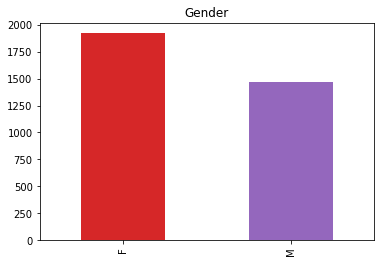

In [137]:
#in the data set we have greater number of females than males
df['sex'].value_counts().plot(kind='bar',color=('C3','C4')).set_title('Gender')

Text(0.5, 1.0, 'Education')

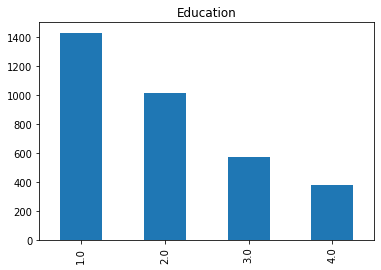

In [138]:
#here we can see more number of primary educated people than secondary,higher secondary and graduated
df['education'].value_counts().plot(kind='bar').set_title('Education') 

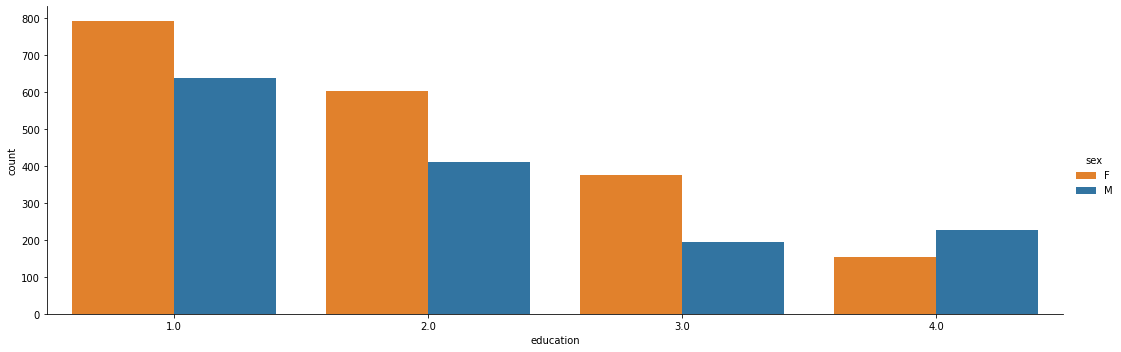

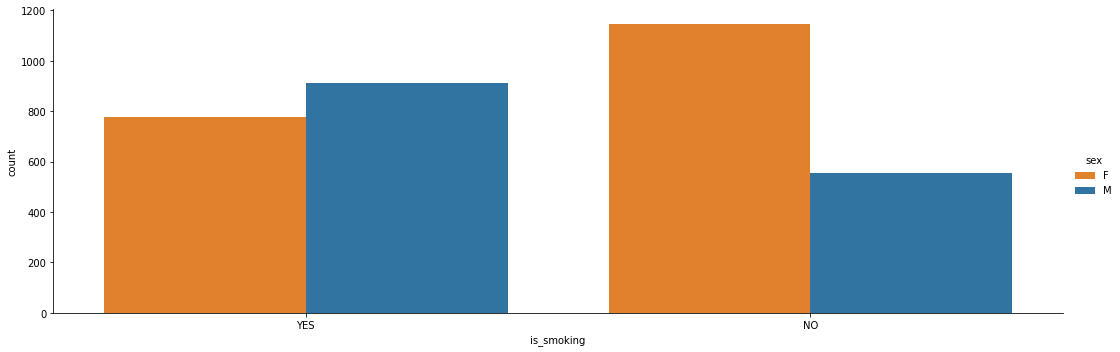

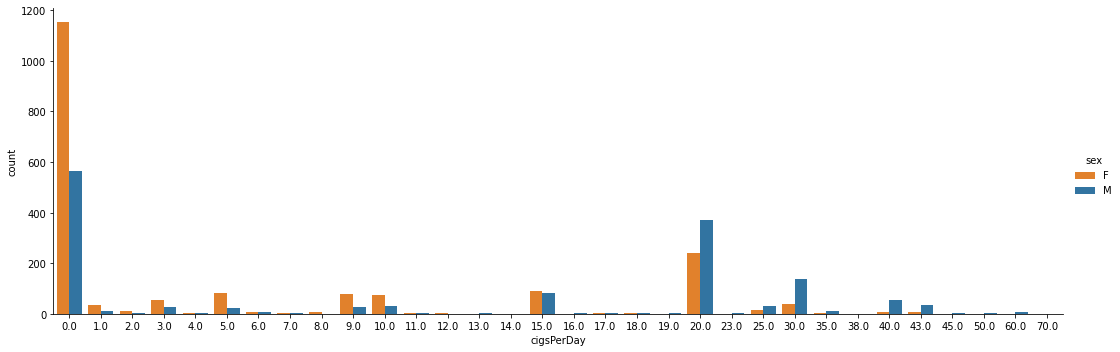

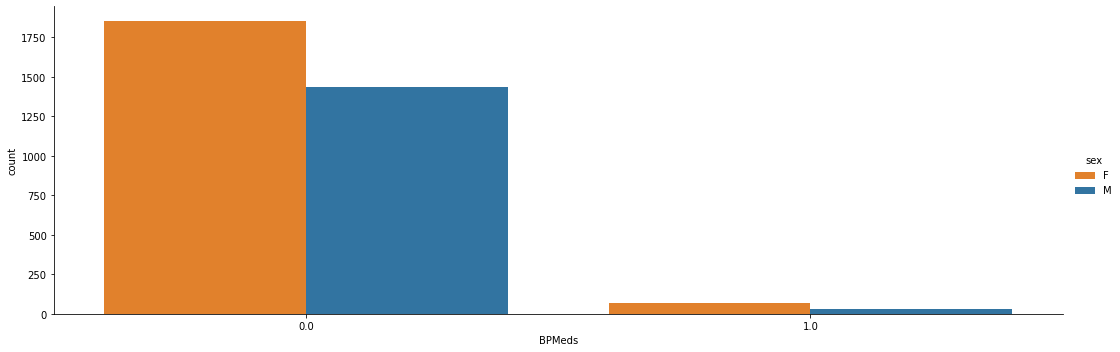

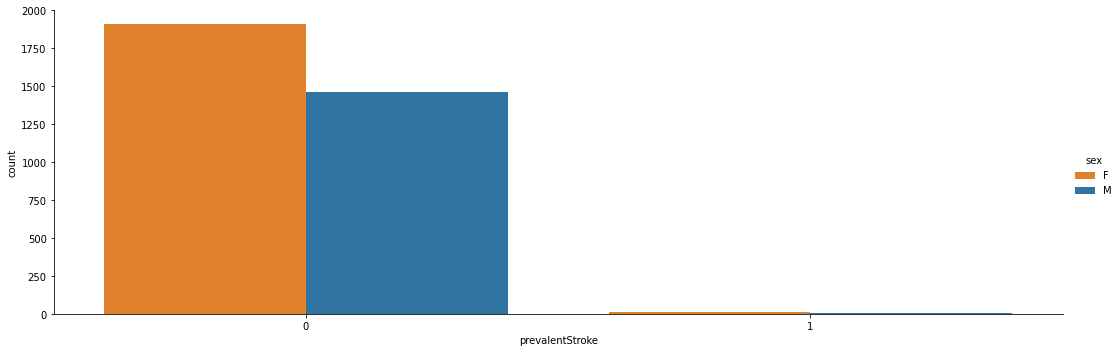

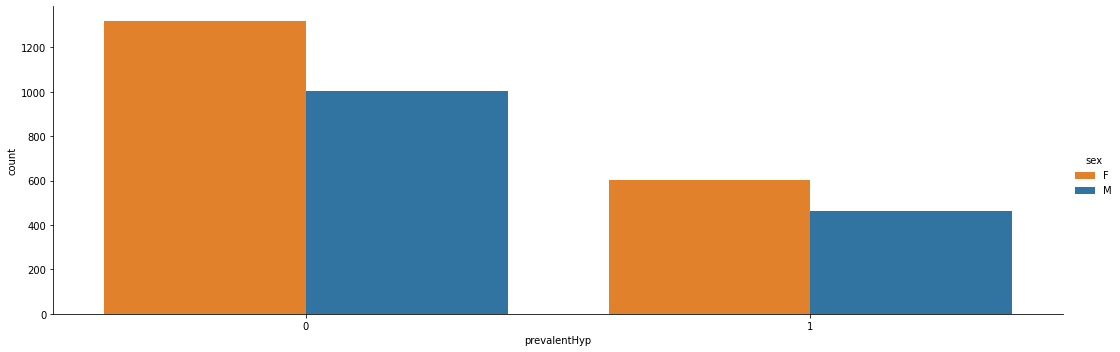

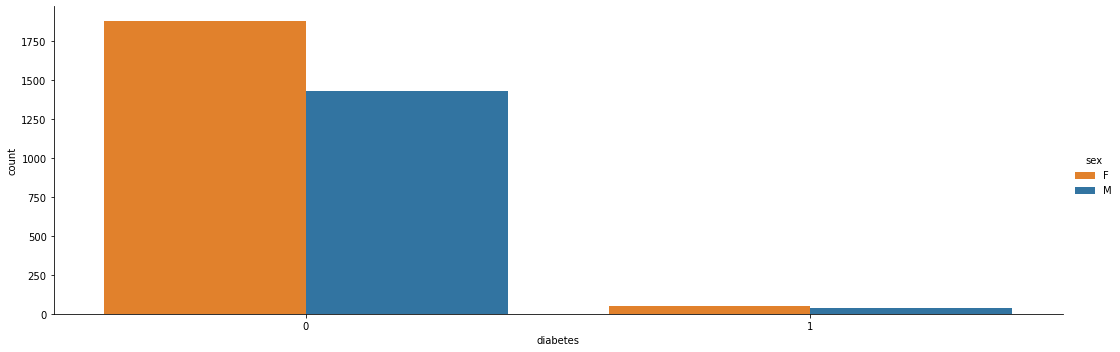

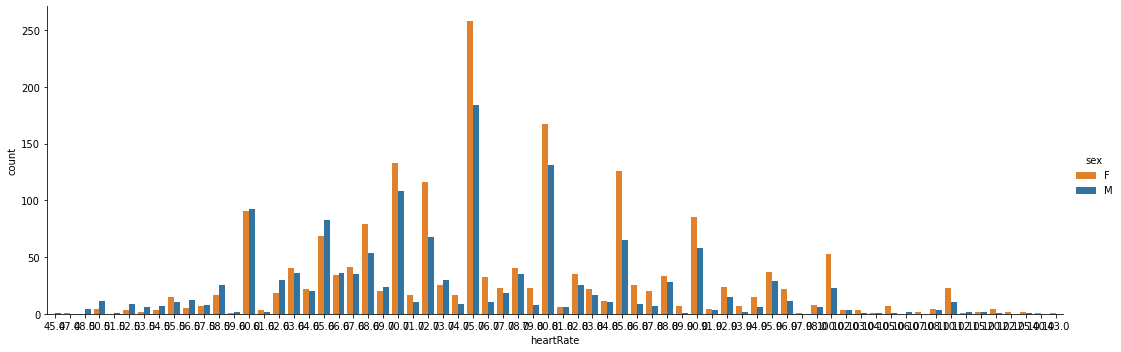

In [139]:
#here we create the separate data frame for the loop
df1 = ['education','is_smoking', 'cigsPerDay','BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes',
     'heartRate']

#By using the loop we plot catplots for the variables  
for i in df1:
    sns.axes_style('whitegrid')
    sns.catplot(i,data=df,aspect=3,kind='count',hue='sex',
            palette=['C1', 'C0'])

#### 1. In education, Females have higher number than Males
#### 2. In smoking, Males have higher number than Females
#### 3. Averagely we see Males consume higher number of cigarates per day
#### 4. Comparitively Females consumes higher number of BP medicines than Males
#### 5. Almost zero patients are affected by the prevalent stroke.
#### 6. In the Females, prevalent Hypertension is greater than Males
#### 7. Diabetes is seen very rare case in males and females.
#### 8. In Females we see heart rate is more comparitively than males. 

In [140]:
df2 = ['totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [141]:
#we create the correlation matrix for the checking the highest and lowest correlation
corr_matrix = df.corr()
corr_matrix

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.166801,-0.190973,0.122114,0.059038,0.308826,0.107875,0.270254,0.404845,0.221896,0.135219,-0.002511,0.105646,0.224927
education,-0.166801,1.000000,0.010931,-0.019110,-0.033810,-0.077716,-0.054077,-0.014207,-0.130768,-0.055359,-0.129545,-0.045746,-0.045583,-0.050597
cigsPerDay,-0.190973,0.010931,1.000000,-0.036341,-0.041836,-0.078049,-0.048672,-0.025195,-0.099263,-0.066688,-0.100159,0.065880,-0.048254,0.069161
BPMeds,0.122114,-0.019110,-0.036341,1.000000,0.116183,0.256892,0.070932,0.077497,0.260384,0.198780,0.087275,0.018094,0.055345,0.087349
prevalentStroke,0.059038,-0.033810,-0.041836,0.116183,1.000000,0.071652,0.010115,-0.010743,0.057568,0.047235,0.017244,-0.019188,0.022722,0.068627
prevalentHyp,0.308826,-0.077716,-0.078049,0.256892,0.071652,1.000000,0.082565,0.158201,0.699285,0.612897,0.297564,0.150839,0.075590,0.166544
diabetes,0.107875,-0.054077,-0.048672,0.070932,0.010115,0.082565,1.000000,0.058730,0.124011,0.061165,0.086739,0.039734,0.559424,0.103681
totChol,0.270254,-0.014207,-0.025195,0.077497,-0.010743,0.158201,0.058730,1.000000,0.196882,0.153828,0.113071,0.085837,0.060073,0.094931
sysBP,0.404845,-0.130768,-0.099263,0.260384,0.057568,0.699285,0.124011,0.196882,1.000000,0.781908,0.329374,0.178267,0.125491,0.212703
diaBP,0.221896,-0.055359,-0.066688,0.198780,0.047235,0.612897,0.061165,0.153828,0.781908,1.000000,0.376971,0.174859,0.069756,0.135979


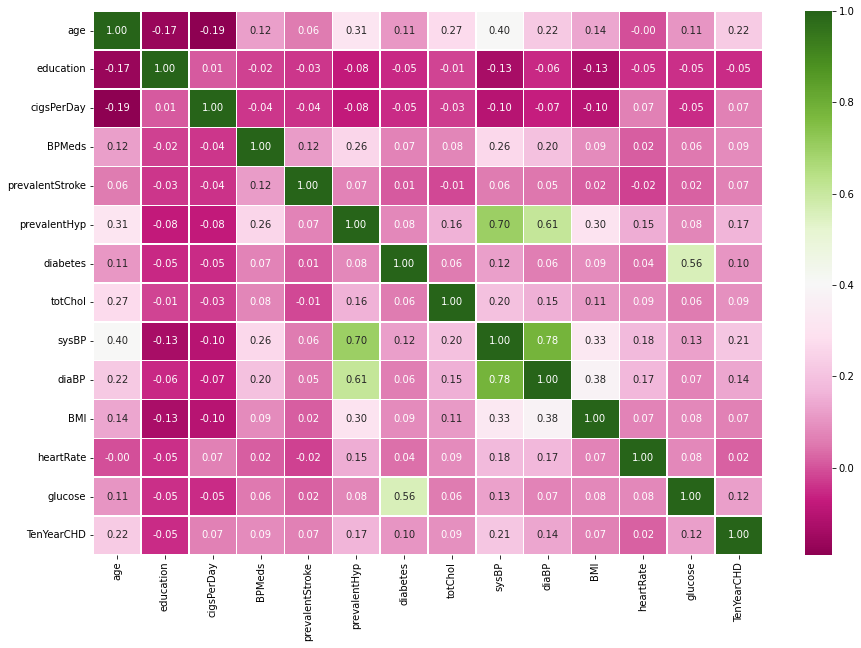

In [142]:
#by using seaborn liabrary we plot correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True,linewidths=0.5,fmt="0.2f",cmap="PiYG");

([<matplotlib.patches.Wedge at 0x7fbc3d174e80>,
 [Text(-0.2516691044852485, 1.1733126871587103, 'M'),
  Text(0.23489116418623177, -1.0950918413481296, 'F')],
 [Text(-0.1468069776163949, 0.6844324008425808, '56.73%'),
  Text(0.1300290373173783, -0.6062115550320002, '43.27%')])

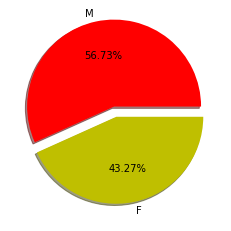

In [143]:
#for total number of patients we count how many males and females
plt.pie(df['sex'].value_counts(),shadow=True,labels=['M','F'],colors=('r','y'),autopct='%1.2f%%',
       pctdistance=0.6,explode=(0.1,0.02))

In [144]:
#copy here origial data frame to df_1
df_1 = df.copy()

In [145]:
#we create a new data frame calling as numeric_feature and dropping some variables which has binary value
numeric_feature = df_1.drop(['age','education','sex','is_smoking'],axis=1)
numeric_feature

,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,3.0,0.0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc3d0da6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc3d0dad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc3d0da340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc3d0e4460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc3d0e4760>],
 'means': []}

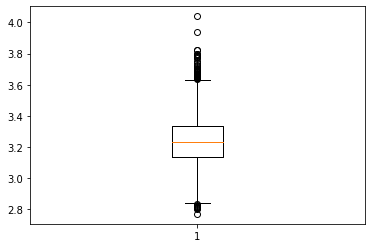

In [146]:
#plotting box plot for BMI variable, we can see outliers here 
plt.boxplot(np.log(df['BMI']))

1.0202267115551933

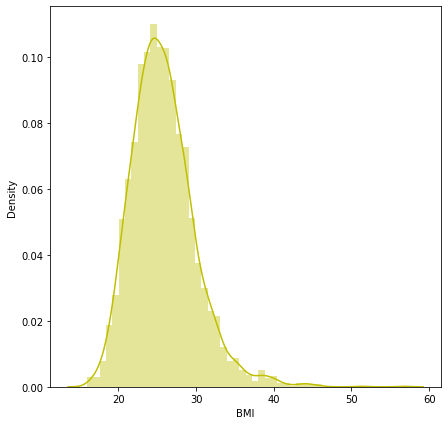

In [147]:
#checking normality for BMI variable and the skewness of the data set
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['BMI'],color = 'y')

df['BMI'].skew()

here we can see clearly the distribution is positively skewed with skewness 1.020

0.34768341380093004

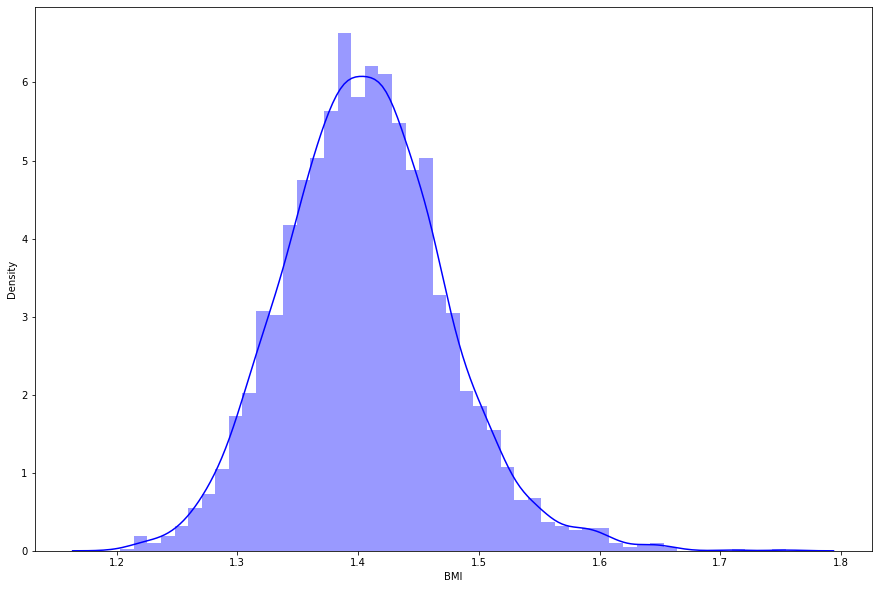

In [148]:
#here we use log transformation for making data normally distributed
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.distplot(np.log10(df['BMI']),color = 'b')

np.log10(df['BMI']).skew()

By using the log transformatio we try to make data normal, and in the skewness value we clearly  see how it tends to normal from 1.020 to 0.3476

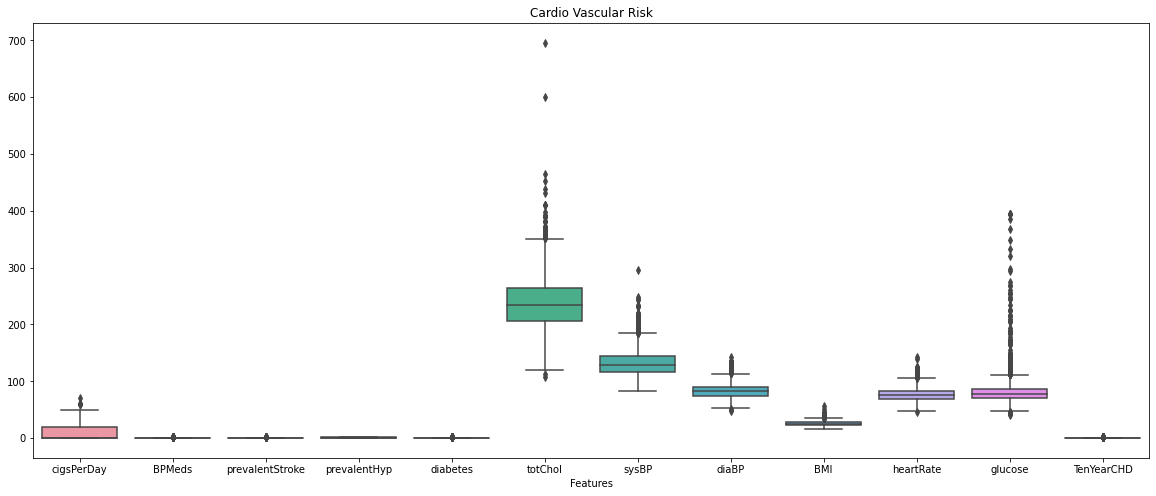

In [149]:
#for the numeric data set we check outliers here
plt.figure(figsize=(20,8))
sns.boxplot(data=numeric_feature)
plt.title('Cardio Vascular Risk')
plt.xlabel('Features')
plt.show()

In the data set we clearly see the outliers in the various features

6.340386812035594

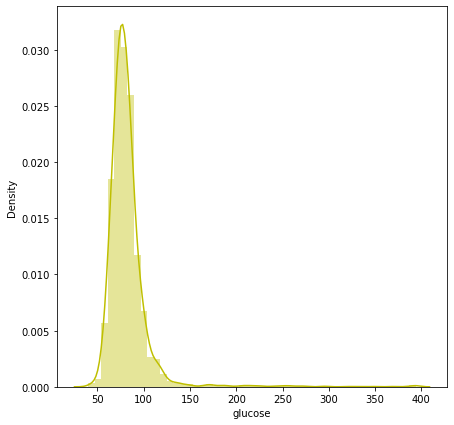

In [150]:
#in the data set feature 'glucose' have the positively skewed data and we try to make it normal using log transformation
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['glucose'],color='y')

df['glucose'].skew()

2.3422837966731067

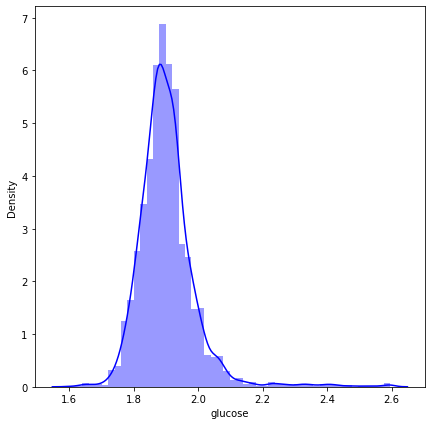

In [151]:
#here we use log transformation to create the data set normal and skewness towards zero
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(np.log10(df['glucose']),color='b')
np.log10(df['glucose']).skew()

we reduced the skewness from 6 to 2

In [152]:
#here we count total males in our target variable showing TenYearCHD positive
male_1 = pd.DataFrame(df[(df['TenYearCHD']==1) & (df['sex']=='M')])
male_1['TenYearCHD'].value_counts()

1    272
Name: TenYearCHD, dtype: int64

In [153]:
##here we count total males in our target variable showing TenYearCHD negative
male_0 = pd.DataFrame(df[(df['TenYearCHD']==0) & (df['sex']=='M')])
male_0['TenYearCHD'].value_counts()

0    1195
Name: TenYearCHD, dtype: int64

In [154]:
#here we count total females in our target variable showing TenYearCHD positive
female_1 = pd.DataFrame(df[(df['TenYearCHD']==1) & (df['sex']=='F')])
female_1['TenYearCHD'].value_counts()

1    239
Name: TenYearCHD, dtype: int64

In [155]:
#here we count total females in our target variable showing TenYearCHD negative
female_0 = pd.DataFrame(df[(df['TenYearCHD']==0) & (df['sex']=='F')])
female_0['TenYearCHD'].value_counts()

0    1684
Name: TenYearCHD, dtype: int64

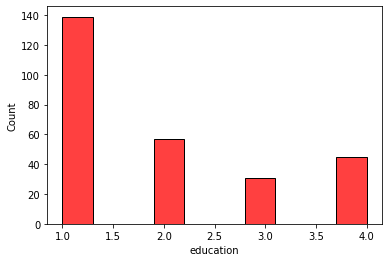

In [156]:
#for feature education for affected male we plot the histplot and we have conclusions
sns.histplot(male_1['education'],color='r')

1. We can see more number of male patients have primary qualifications
2. Secondary and higher education have combinely more than 100 male patients
3. We see moderate educated male patients have less in number 

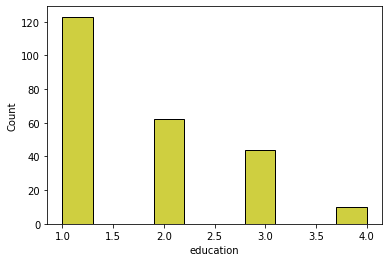

In [157]:
#this histplot for affected females and their education
sns.histplot(female_1['education'],color='y',legend=True,stat='count')

1. Comparitivley we see females have less number of patients having primary education.
2. Well educated females have less number in affecting the risk

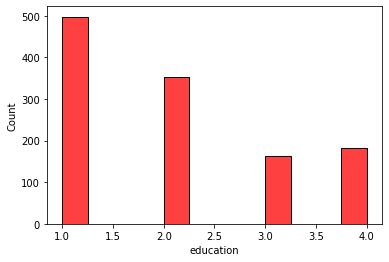

In [158]:
##for feature education for un-affected male we plot the histplot and we have conclusions
sns.histplot(male_0['education'],color='r')

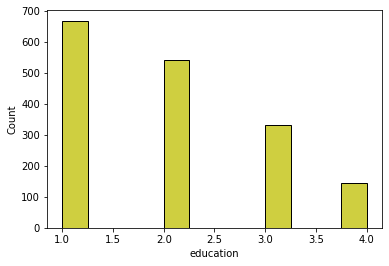

In [159]:
 ##this histplot for un-affected females and their education
 sns.histplot(female_0['education'],color='y')


Overall we see how education affects the Cardio vascular risk, we can conclude that comparitively less educated patients have higher in both the caese of heart risk.

In that females have highest in number than males.

Highly educated people are less affected and we can say that they are more aware about their habits and halth.

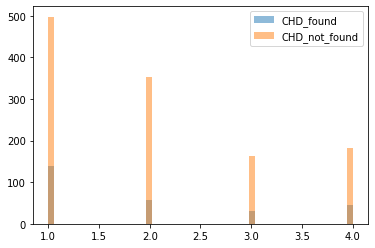

In [160]:
#here we checking education of males and females in joint histogram
plt.hist(male_1['education'],bins=50,label='CHD_found',alpha=0.5)
plt.hist(male_0['education'],bins=50,label='CHD_not_found',alpha=0.5)
plt.legend(loc='best')
plt.show()

In [161]:
#creating the variables of genders respective to their BMI 
male = df[(df['sex']=="M")&df['BMI']]
female = df[(df['sex']=='F')&df['BMI']]

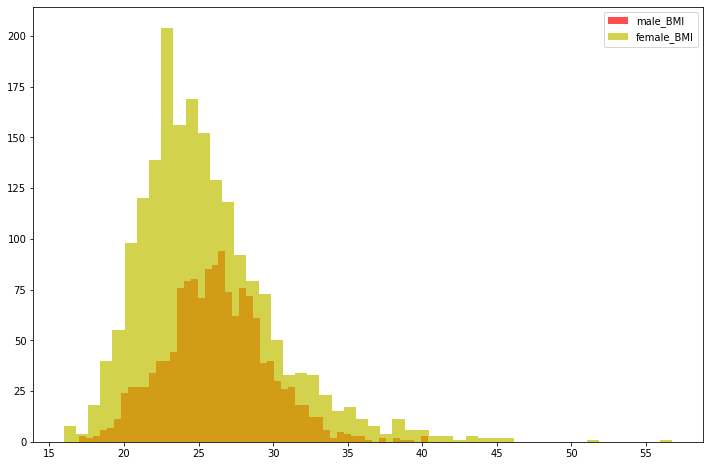

In [162]:
#this plot shows how gender wise distribution of BMI spread
plt.figure(figsize=(12,8))
plt.hist(male['BMI'],label='male_BMI',alpha=0.7,bins=50,color='r')
plt.hist(female['BMI'],label='female_BMI',alpha=0.7,bins=50,color='y')
plt.legend(loc='best')
plt.show()

Males have seen very low Body mass index than females.

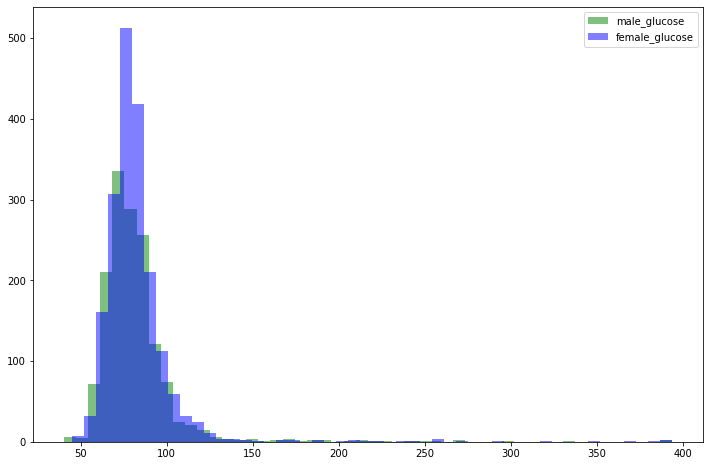

In [163]:
##this plot shows how gender wise distribution of glucose spread
plt.figure(figsize=(12,8))
plt.hist(male['glucose'],label='male_glucose',alpha=0.5,bins=50,color='g')
plt.hist(female['glucose'],label='female_glucose',alpha=0.5,bins=50,color='b')
plt.legend(loc='best')
plt.show()

In this visual we see females consumes more glucose than males.

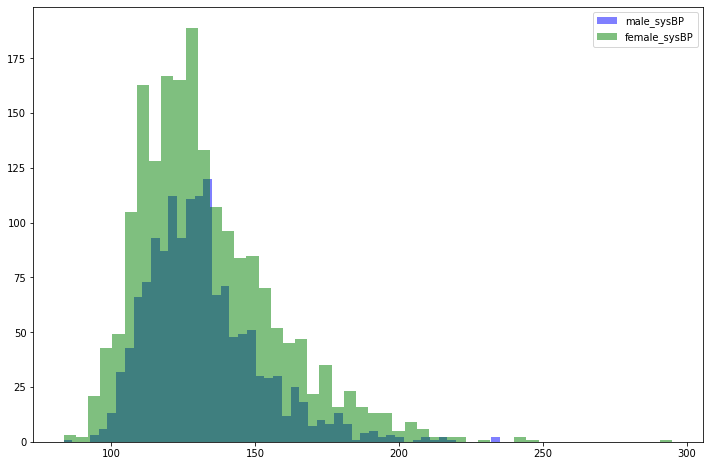

In [164]:
#this plot shows how gender wise distribution of sysBP(BP measure) spread
plt.figure(figsize=(12,8))
plt.hist(male['sysBP'],label='male_sysBP',alpha=0.5,bins=50,color='b')
plt.hist(female['sysBP'],label='female_sysBP',alpha=0.5,bins=50,color='g')
plt.legend(loc='best')
plt.show()

Females have greater Systolic Blood Pressure than males.

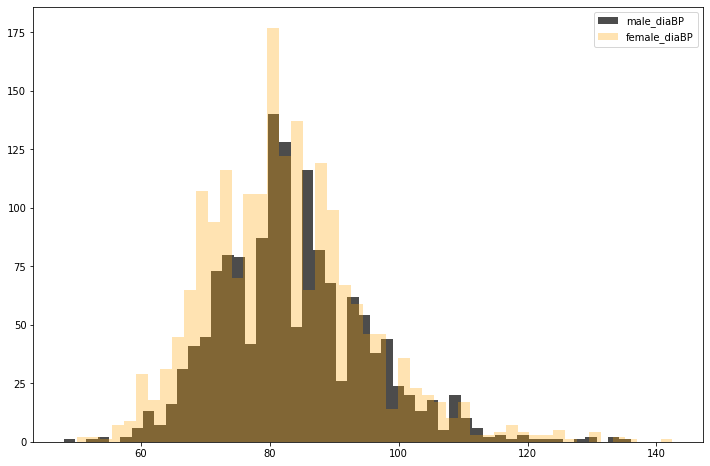

In [165]:
##this plot shows how gender wise distribution of diaBP(BP measure) spread
plt.figure(figsize=(12,8))
plt.hist(male['diaBP'],label='male_diaBP',alpha=0.7,bins=50,color='black')
plt.hist(female['diaBP'],label='female_diaBP',alpha=0.3,bins=50,color='orange')
plt.legend(loc='best')
plt.show()

Both males and females have almost equal in Diastolic Blood Pressure, females show some fluctuated values.

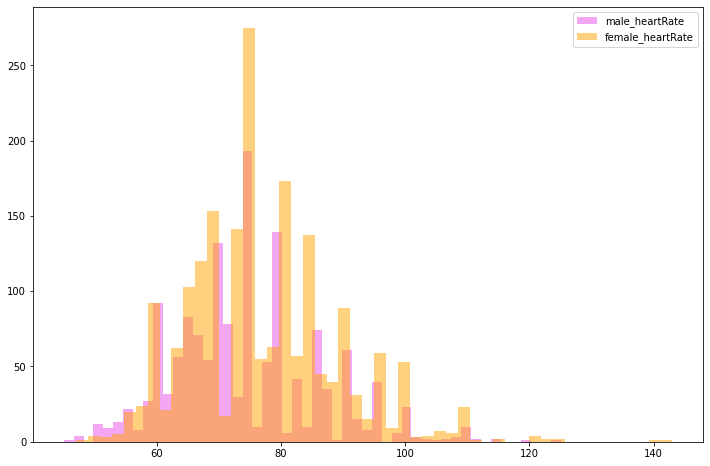

In [166]:
##this plot shows how gender wise distribution of heart rate spread
plt.figure(figsize=(12,8))
plt.hist(male['heartRate'],label='male_heartRate',alpha=0.7,bins=50,color='violet')
plt.hist(female['heartRate'],label='female_heartRate',alpha=0.5,bins=50,color='orange')
plt.legend(loc='best')
plt.show()

Females have higher heart rate than males.

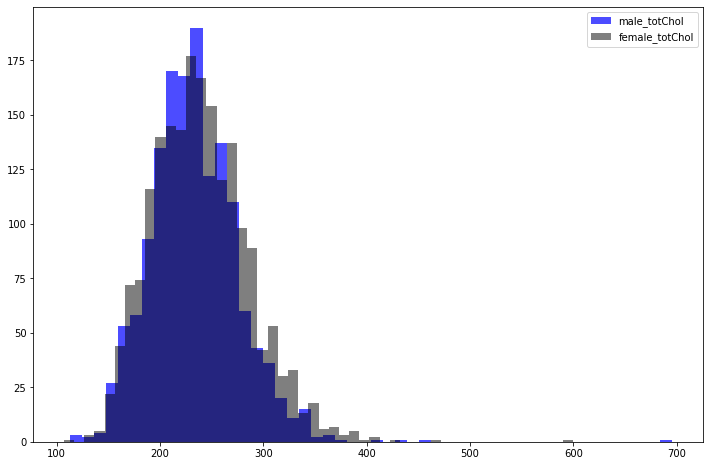

In [167]:
##this plot shows how gender wise distribution of total cholesterol spread
plt.figure(figsize=(12,8))
plt.hist(male['totChol'],label='male_totChol',alpha=0.7,bins=50,color='blue')
plt.hist(female['totChol'],label='female_totChol',alpha=0.5,bins=50,color='black')
plt.legend(loc='best')
plt.show()

Not much difference in the heart rates of both male and females

Male 0    1459
1       8
Name: prevalentStroke, dtype: int64


Female 0    1909
1      14
Name: prevalentStroke, dtype: int64


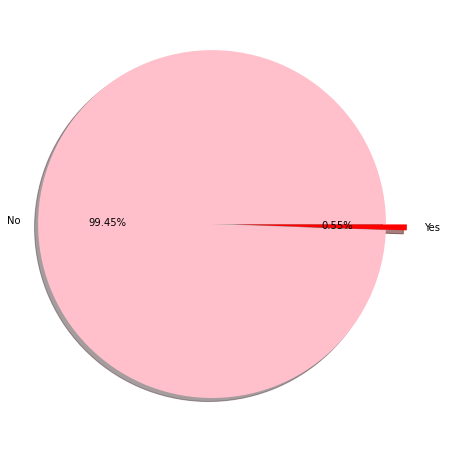

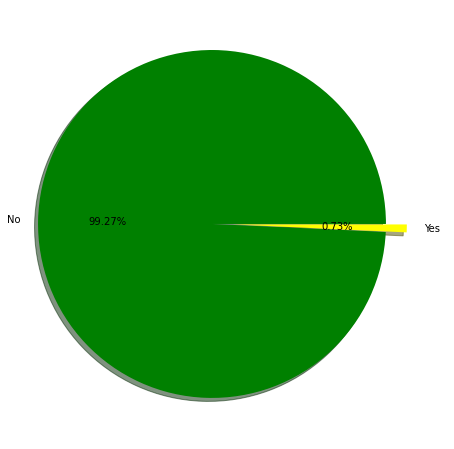

In [168]:
# here by using the pie plot we calculate the % of prevalent stroke in males and females
plt.figure(figsize=(8,8))
plt.pie(male['prevalentStroke'].value_counts(),shadow=True,autopct='%1.2f%%',
        labels=['No','Yes'],explode=(0.1,0.02),colors=('pink','red'))
print('Male',male['prevalentStroke'].value_counts())
print('\n')
plt.figure(figsize=(8,8))
plt.pie(female['prevalentStroke'].value_counts(),shadow=True,autopct='%1.2f%%',
        labels=['No','Yes'],explode=(0.1,0.02),colors=('green','yellow'))
print('Female',female['prevalentStroke'].value_counts())

Male 0    1002
1     465
Name: prevalentHyp, dtype: int64


Female 0    1319
1     604
Name: prevalentHyp, dtype: int64


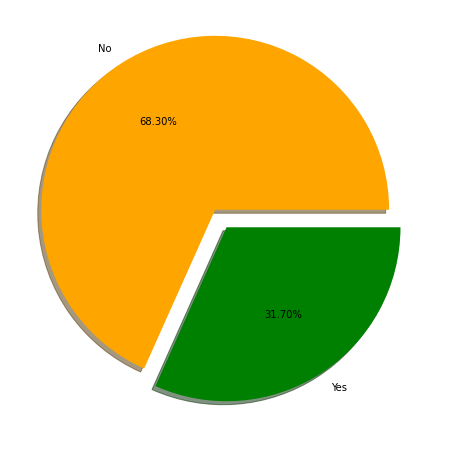

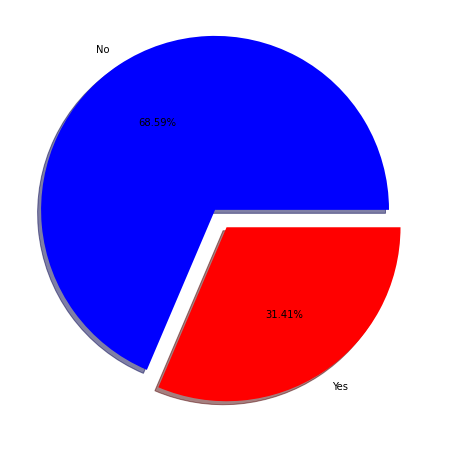

In [169]:
# here by using the pie plot we calculate the % of prevalent hyper tension in males and females
plt.figure(figsize=(8,8))
plt.pie(male['prevalentHyp'].value_counts(),shadow=True,autopct='%1.2f%%',
        labels=['No','Yes'],explode=(0.1,0.02),colors=('orange','green'))
print('Male',male['prevalentHyp'].value_counts())
print('\n')
plt.figure(figsize=(8,8))
plt.pie(female['prevalentHyp'].value_counts(),shadow=True,autopct='%1.2f%%',
        labels=['No','Yes'],explode=(0.1,0.02),colors=('blue','red'))
print('Female',female['prevalentHyp'].value_counts())

In [170]:
#total count of patients who took BP medicines(1) and who doesn't(0)
df.BPMeds.value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [171]:
#total count of male patients who took BP medicines(1) and who doesn't(0)
male['BPMeds'].value_counts()

0.0    1436
1.0      31
Name: BPMeds, dtype: int64

In [172]:
#total count of female patients who took BP medicines(1) and who doesn't(0)
female['BPMeds'].value_counts()


0.0    1854
1.0      69
Name: BPMeds, dtype: int64

Text(0.5, 1.0, 'BPMeds_male')

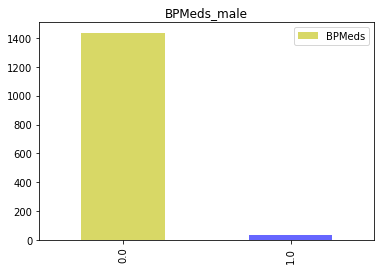

In [173]:
#by ploting the bar we conclude that more than 95% mens not consuming the BP medicine
male['BPMeds'].value_counts().plot(kind='bar',color=('y','b'),legend=True,alpha=0.6).set_title('BPMeds_male')

Text(0.5, 1.0, 'BPMeds_female')

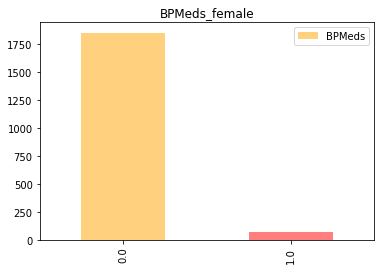

In [174]:
#by ploting the bar we conclude that more than 95% females not consuming the BP medicine
female['BPMeds'].value_counts().plot(kind='bar',color=('orange','red'),
                                     legend=True,alpha=0.5).set_title('BPMeds_female')

Here we conclude that for the both males and female, they were not consuming the BP medicines and the patients less than 5% consumes medicine.

In [175]:
#we create a list for features contains continuos values
con = ['totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate']

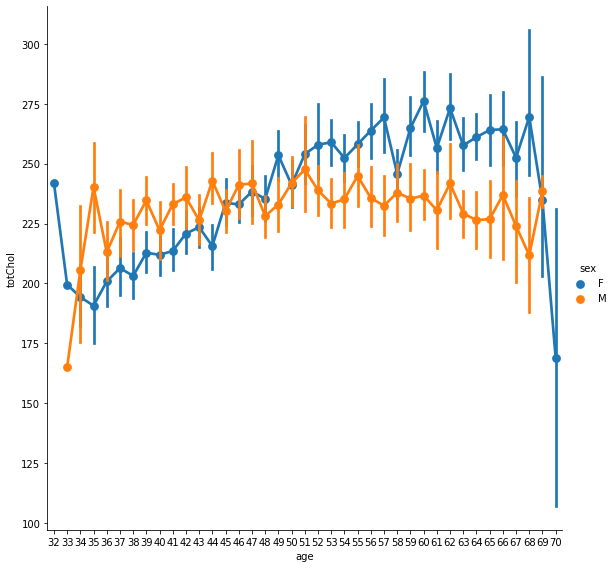

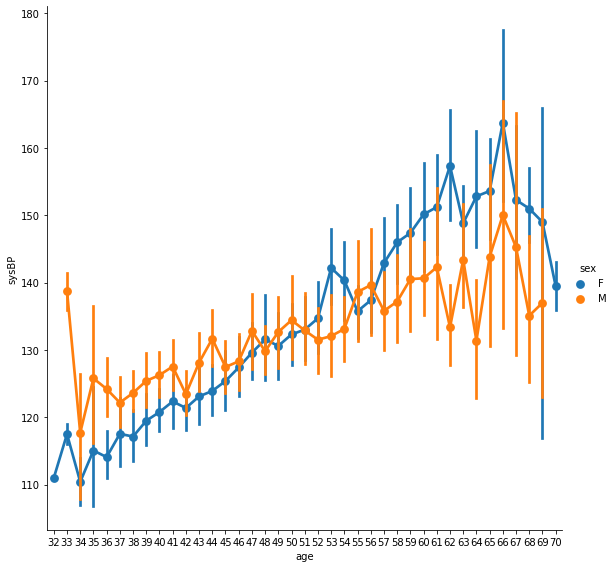

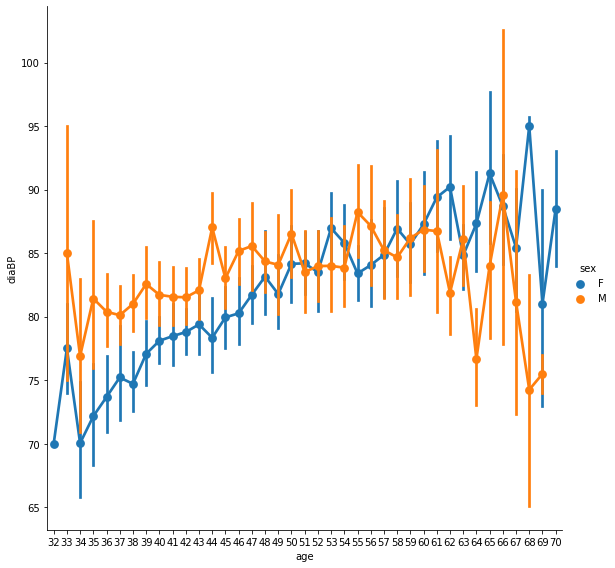

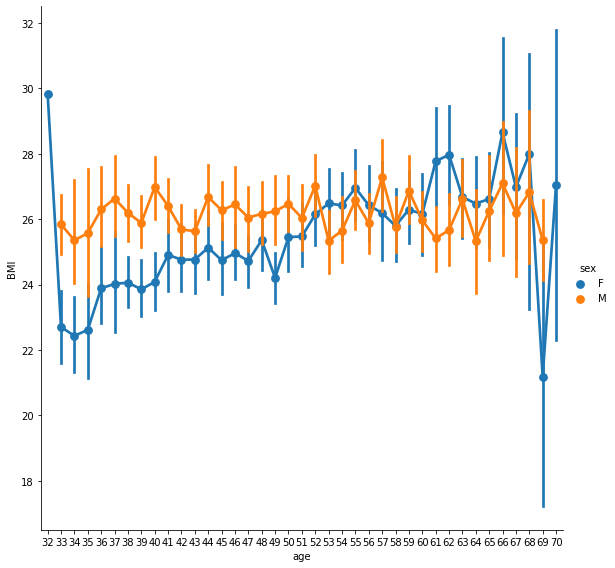

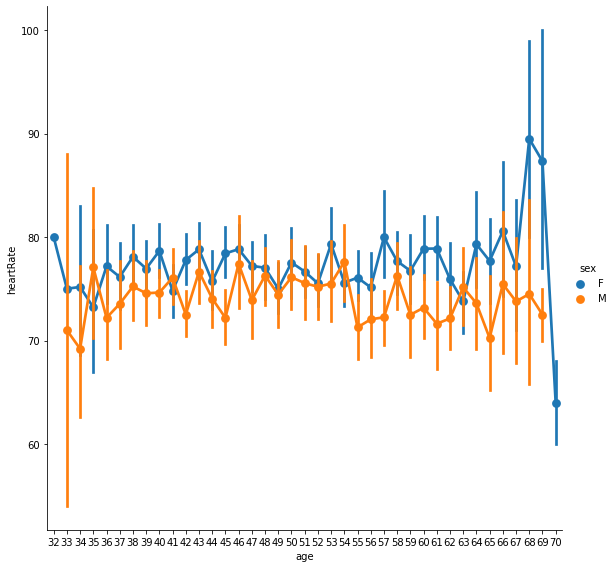

In [176]:
for i in con:
    sns.factorplot(data=df,x='age',y=i,hue='sex',size=8)

In [177]:
#In the dataset we have two 'object' type data set, so we need to convert them
df['sex'] = df['sex'].map({'M':1,'F':0})
df['sex'] = df['sex'].astype(int,copy=False)

df['is_smoking'] = df['is_smoking'].map({'YES':1,'NO':0})
df['is_smoking'] = df['is_smoking'].astype(int,copy=False)

**Transforming some features in the data set**

In [178]:
## After analysing the data and study the data we conclude that we need to rearange some information.

# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

###**Balancing** the dataset based on the target variable

In [179]:
# seperate the independent and target variables 
#creating the independent variables 
X = df.drop('TenYearCHD',axis='columns').values
y = df['TenYearCHD'].values

In [180]:
#Dependent variable is 'TenYearCHD', so checking for data balance
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [181]:
'''here we trained the data before using the SMOTE method because if we used it after 
 the training the data set then we may have misleaded model'''

'here we trained the data before using the SMOTE method because if we used it after \n the training the data set then we may have misleaded model'

#### here we can see clearly data imbalance for the target variable
### So we use the SMOTE method to handle the imbalnced data

In [182]:
smote_ = SMOTE()
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [183]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 3390 rows and 14 columns
y has 3390 rows


In [184]:
# Using SMOTE to oversample
X, y = smote_.fit_resample(X, y)

In [185]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


In [186]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


## Scaling the data for Model fitting

In [187]:
## Here we use the standard scale for scaling the features for better adaption
std = StandardScaler()
columns = ['age','cigsPerDay','totChol', 'BMI', 'heartRate', 'glucose',]
df[columns] = std.fit_transform(df[columns])

# Implementation of models

## Logistic

In [188]:
#creating the independent variables 
X = df.drop('TenYearCHD',axis='columns') 

In [189]:
#creating the dependent variable
y = df['TenYearCHD']

In [190]:
#preprocessing of the data, train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [191]:
#shape of the trained data set of independent variable
X_train.shape

(2712, 14)

In [192]:
#shape of the test data set of independent variable
X_test.shape

(678, 14)

In [193]:
#shape of the train data of dependent variable
y_train.shape

(2712,)

In [194]:
#fitting the logistic regression with max_iter
clf = LogisticRegression(fit_intercept=True,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [195]:
#coefficients the independent variables
clf.coef_

array([[ 0.52980763, -0.05152675,  0.45995052,  0.17186528,  0.26034158,
         0.17726237,  0.9845853 ,  0.29282353,  0.35914531,  0.14424299,
         0.00292606, -0.00388877,  0.1678783 ,  0.0159484 ]])

In [196]:
#intercept of the logistic equation
clf.intercept_

array([-3.13751377])

In [197]:
#calculating the probabilities of trained and tested data
train_preds_log = clf.predict_proba(X_train)
test_preds_log= clf.predict_proba(X_test)

In [198]:
#predicted probabilities of test_preds_log
test_preds_log

array([[0.89849299, 0.10150701],
       [0.89905249, 0.10094751],
       [0.92870053, 0.07129947],
       ...,
       [0.73703879, 0.26296121],
       [0.80976998, 0.19023002],
       [0.8625122 , 0.1374878 ]])

In [199]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [200]:
train_preds


array([0.07378773, 0.32117199, 0.09297843, ..., 0.03611859, 0.20748584,
       0.25139913])

In [201]:
test_preds

array([0.10150701, 0.10094751, 0.07129947, 0.27923197, 0.2342507 ,
       0.16034595, 0.02878101, 0.04005785, 0.16726664, 0.15072401,
       0.44998646, 0.05163355, 0.13777975, 0.06343357, 0.14308784,
       0.06086329, 0.1094155 , 0.2579429 , 0.19993983, 0.07246482,
       0.14088105, 0.08464358, 0.17604424, 0.16730643, 0.09223089,
       0.24634114, 0.05121994, 0.09762983, 0.19079998, 0.20969319,
       0.04152525, 0.301159  , 0.12119611, 0.17844539, 0.02729149,
       0.14384953, 0.04425683, 0.10125819, 0.06935499, 0.07577834,
       0.36266363, 0.182288  , 0.05271976, 0.27573083, 0.05390735,
       0.05257206, 0.17061965, 0.07836477, 0.12550329, 0.08309694,
       0.04871988, 0.126269  , 0.42474527, 0.11648076, 0.0944414 ,
       0.10501094, 0.02780688, 0.0675088 , 0.23858331, 0.01961567,
       0.40169369, 0.03016812, 0.04078918, 0.08339092, 0.05443566,
       0.04919622, 0.17294646, 0.13133831, 0.05971732, 0.02883612,
       0.20203678, 0.0431869 , 0.1759787 , 0.13412178, 0.09892

In [202]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [203]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [204]:
test_class_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [205]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)
print(f'The accuracy on train data is, {train_accuracy}')
print(f'The accuracy on test data is, {test_accuracy} ')

The accuracy on train data is, 0.8628318584070797
The accuracy on test data is, 0.8377581120943953 


In [206]:
#confusion matrix of predicted class
cm1 = confusion_matrix(y_train,train_class_preds)
cm1

array([[2306,   10],
       [ 362,   34]])

In [207]:
#classification report of y_test and predicted class
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       563
           1       0.86      0.05      0.10       115

    accuracy                           0.84       678
   macro avg       0.85      0.53      0.50       678
weighted avg       0.84      0.84      0.77       678



In [208]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2316
           1       0.77      0.09      0.15       396

    accuracy                           0.86      2712
   macro avg       0.82      0.54      0.54      2712
weighted avg       0.85      0.86      0.81      2712



##Conclusion :
1. We get training accuracy of model is 86%
2. We get testing accuracy of model is almost 84%
3. Here we can see the Recall score for both testing and training sets is more than 0.90, its very good.
4. Precision score for both training and testing is more than 0.84.
5. F1-score for both the training and testing data is also good

##**k-Nearest Neighbor** Classifier

In [209]:
#pre-processing of the data with 40% of testing data for k-NN
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=22,stratify=y)

In [210]:
#here we set ups arrays to store training and testing accuracies
neighbors = np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [211]:
# Setup a knn classifier with k neighbors
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    #fitting the k-NN model
    knn.fit(X_train,y_train)

    #computing the training accuracy
    train_accuracy[i] = knn.score(X_train,y_train)

    #computing the testing accuracy
    test_accuracy[i] = knn.score(X_test,y_test)

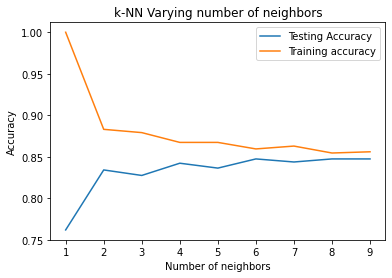

In [212]:
#creating the plot for k-NN
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [213]:
#as we can see training and testing accuracy are closer to each other at point 8 so we take n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors=8)

In [214]:
#fitting the model with training dataset
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [215]:
#checking k-NN score for the testing data
knn.score(X_test,y_test)

0.8473451327433629

In [216]:
# Let us get the predictions using the classifier we had fit above
y_pred_test_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

In [217]:
#confusion matrix for testing data set
confusion_matrix(y_test,y_pred_test_knn)

array([[1139,   13],
       [ 194,   10]])

In [218]:
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

In [219]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob_knn)

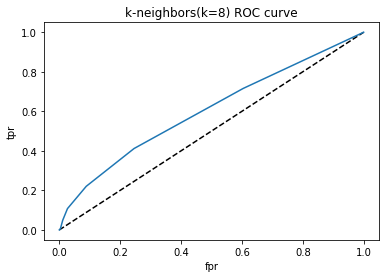

In [220]:
#roc_auc curve using true positive rate and false positive rate
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('k-neighbors(k=8) ROC curve')
plt.show()

In [221]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_prob_knn) 

0.6029050074891068

In [222]:
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1152
           1       0.43      0.05      0.09       204

    accuracy                           0.85      1356
   macro avg       0.64      0.52      0.50      1356
weighted avg       0.79      0.85      0.79      1356



In [223]:
print(classification_report(y_train,y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1727
           1       0.69      0.07      0.12       307

    accuracy                           0.85      2034
   macro avg       0.77      0.53      0.52      2034
weighted avg       0.83      0.85      0.80      2034



##**Conclusion** -
For both the Testing and Training dataset we got almost equal accuracy score 85%

Recall, Precision and F1-score is also good

##Definig the Hyper-parameter tune k-NN

In [224]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [225]:
#fitting the k-NN classifier with GridsearchCV
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)

In [226]:
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [227]:
#best score of GScv for knn
knn_cv.best_score_

0.8504424778761062

In [228]:
#here is the best parameter for knn
knn_cv.best_params_

{'n_neighbors': 27}

## Support Vector Machine

In [229]:
#pre-processing for the fitting of model
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y,test_size=0.2,random_state=4)

In [230]:
#shape of training data of an independent varibles
X_train.shape

(2034, 14)

In [231]:
#shape of testing data of an independent variable
X_test.shape

(1356, 14)

In [232]:
#shape of training data of dependent variable
y_train.shape

(2034,)

In [233]:
#shape of testing data of dependent variable
y_test.shape

(1356,)

In [234]:
#fitting a SVM model 
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train_svm,y_train_svm)

#predicting the testing values
y_predict = classifier.predict(X_test_svm)
y_predict_train = classifier.predict(X_train_svm)

In [235]:
#classification report of testing data set and predicted data set
print(classification_report(y_train_svm,y_predict_train))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2291
           1       0.00      0.00      0.00       421

    accuracy                           0.84      2712
   macro avg       0.42      0.50      0.46      2712
weighted avg       0.71      0.84      0.77      2712



In [236]:
#classification report of testing data set and predicted data set
print(classification_report(y_test_svm,y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       588
           1       0.00      0.00      0.00        90

    accuracy                           0.87       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.75      0.87      0.81       678



#**Observations** :
1. In the dataset we had have some missing values and fill them.
2. In number of patients Females are comparitively more. 
3. Primary educated patients are greater in number.
4. Males consumes more cigarates per day than Females
5. No prevalent stroke history in both Male and Female cases.
6. We have seen the females have comparitively greater hypertension than males.
7. Both males and females, they were not consuming the BP medicines and the patients less than 5% consumes medicine.


#**Conclusion**:
In our analysis we initially did EDA on all the features of the dataset. Our dependet variable is 'OneYearCHD'. In our dataset we have some missing values and we fill them with different methods, we dont have duplicats in the data. 

In the dataset we have two 'Object' data type and before the further operations we Encode them as integer. We use differnt types of visualization techniques to plot some graphs.

Further we use SMOTE(Synthetic Minority Oversampling Technique) for balancing the imbalance of the dataset. After this we scale the dataset by using Standard Scaler and then use some Machine Learning Classification techniques.


1. Among all three classifiers SVM gives the highest testing accuracy 87% and k-NN gives 85%, Logistic classifier gives 84%
2. In hyper parametere tunning in k-NN is also gives us same accuarcy.
3. 